In [ ]:
pwd

In [ ]:
import cv2
import glob
import numpy as np
import statistics
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
import timeit
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns


#using existing face and eye detecor model provided by openCV
face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('haarcascade_eye.xml') 

 

In [ ]:
path = glob.glob('G:\\DLCV_Practice\\02_Datasets\\01_High_Res Image_Datasets_Bulk\\White_Leader_Mixed\\*.jpg')

In [ ]:
path = glob.glob('G:\\DLCV_Practice\\02_Datasets\\01_High_Res Image_Datasets_Bulk\\White_Leader_Mixed\\*.jpg')
numberOfImage = 0
numberOfFace = 0
face_list = []
width_of_face = []


for file in path:
    img = cv2.imread(file)
    
    ori_img = img
    
    if img is None:
        continue
        
    height, width = img.shape[:2]
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    
    if faces is None:
        continue
    
    for (x,y,w,h) in faces:
                        
        small_fact = int(0.15*h)
        large_fact = int(0.85*h)
        
        print('x=',  x)    
        print('y=',  y)
        print('h=',h)
        print('w=',w)
        print('small_fact = int(0.15*h):',small_fact)
        print('large_fact = int(0.85*h):',large_fact)
        
        top_border = y - small_fact
        bottom_border = y + h + small_fact
        left_border = x - small_fact
        right_border = x + w + small_fact
        
        print('top_border = ',top_border)
        print('bottom_border = ',bottom_border)
        print('left_border = ', left_border)
        print('right_border=',right_border)
        print('----------------------------')
        print()
        
        try:
            face_cropped = ori_img[top_border:bottom_border, left_border:right_border]
            face_resized = cv2.resize (face_cropped,(256,256),interpolation=cv2.INTER_LANCZOS4)
            face_list.append(face_resized)
            width_of_face.append(right_border-left_border)
        except:
            continue
            
        numberOfFace+=1
    numberOfImage +=1
    
print('--FINISHED--')

In [ ]:
try:
    #print('Average Face Size in this Frame',Average(width_of_face))
    print('--360P IMAGES---')
    print('Max. Face Size in this Frame',max(width_of_face))
    print('Min. Face Size in this Frame',min(width_of_face))
    data = Counter(width_of_face)
    get_mode = dict(data)
    mode = [k for k, v in get_mode.items() if v == max(list(data.values()))]
    print('Mode = Face Size in this Frame', mode)
    sns.displot(width_of_face)
except:
    print('No Faces Found')
    pass



In [ ]:
pwd

In [ ]:
print('--OUTPUTING FACES')
print('------------------')
start = timeit.default_timer()
gen_path = './02_Datasets/01_High_Res Image_Datasets_Bulk/White_Leader_Mixed_Faces/White_male_'
suffix = '.jpg'
succes = 0
for i in range(len(face_list)):
    if (i < 10):
        prefix ='000'
    elif (i < 100):
        prefix = '00'
    else:
        prefix = '0'
    
    cv2.imwrite(gen_path+prefix+str(i)+suffix, face_list[i])
    succes +=1

end = timeit.default_timer()
print(succes ,'Images are Exported')
print('Time: ',int((end-start)//60),'Minutes, ', int((end-start)%60),' Seconds')

In [ ]:
plt.imshow(face_list[0])

In [ ]:
#path = glob.glob('G:\\DLCV_Practice\\02_Datasets\\01_High_Res Image_Datasets_Bulk\\White_Man_No_Mask\\*.jpg')
#path = glob.glob('G:\\DLCV_Practice\\02_Datasets\\02_Candidates_New_Google\\European_females\\*.jpg')
path = glob.glob('./White_Man_Mixed2/*.jpg')

In [ ]:
path = glob.glob('./White_Man_Mixed2/*.jpg')
numberOfImage = 0
numberOfFace = 0
face_list = []
width_of_face = []


for file in path:
    img = cv2.imread(file)
    
    ori_img = img
    
    if img is None:
        continue
        
    height, width = img.shape[:2]
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    
    if faces is None:
        continue
    
    for (x,y,w,h) in faces:
                        
        small_fact = int(0.15*h)
        
        top_border = y - small_fact
        bottom_border = y + h + small_fact
        left_border = x - small_fact
        right_border = x + w + small_fact
        
        try:
            face_cropped = ori_img[top_border:bottom_border, left_border:right_border]
            #face_resized = cv2.resize (face_cropped,(256,256),interpolation=cv2.INTER_LANCZOS4)
            face_list.append(face_cropped)
            width_of_face.append(right_border-left_border)
        except:
            continue
            
        numberOfFace+=1
    numberOfImage +=1
    
print('--FINISHED--')
print('Faces Found: ', numberOfFace, 'from', numberOfImage,'images')

In [ ]:
try:
    #print('Average Face Size in this Frame',Average(width_of_face))
    #print('--360P IMAGES---')
    print('Max. Face Size in this Frame',max(width_of_face))
    print('Min. Face Size in this Frame',min(width_of_face))
    data = Counter(width_of_face)
    get_mode = dict(data)
    mode = [k for k, v in get_mode.items() if v == max(list(data.values()))]
    print('Mode = Face Size in this Frame', mode)
    sns.displot(width_of_face)
except:
    print('No Faces Found')
    pass



In [ ]:
import random


In [ ]:
random.shuffle(face_list)

In [ ]:
print('--OUTPUTING FACES')
print('------------------')
start = timeit.default_timer()
#gen_path = './02_Datasets/01_High_Res Image_Datasets_Bulk/White_Man_Faces_Highres/Wh_MH'
gen_path = './White_Man_Mixed2_FaceOnly/'
suffix = '.jpg'
succes = 0
for i in range(len(face_list)):
    if (i < 10):
        prefix ='000'
    elif (i < 100):
        prefix = '00'
    else:
        prefix = '0'
    
    cv2.imwrite(gen_path+prefix+str(i)+suffix, face_list[i])
    succes +=1

end = timeit.default_timer()
print(succes ,'Images are Exported')
print('Time: ',int((end-start)//60),'Minutes, ', int((end-start)%60),' Seconds')

In [ ]:
# For explanation of this code, you can visit this video: https://www.youtube.com/watch?v=8AyKJxBxx0M&t=172s
import os
import requests # pip install requests #to sent GET requests
from bs4 import BeautifulSoup # pip install bs4 #to parse html(getting data out from html, xml or other markup languages)

In [ ]:
pwd

In [ ]:
a = ['Shahidan Kassim','Ismail Sabri Yaakob','Mohamed Azmin Ali','Fadillah Yusof','Mohd Radzi Md Jidin',
                      #news anchor''
                       'Mohd Redzuan Md Yusof','Takiyuddin Hassan','Zulkifli Mohamad Al-Bakri','Khairy Jamaluddin',
                      'Hamzah Zainudin','Tuan Ibrahim','Annuar Musa','Ronald Kiandee','Zuraida Kamaruddin','Noraini Ahmad',
                      'Shamsul Anuar Nasarah','Rina Mohd Harun','Saifuddin Abdullah',
                      'Jokowi','Sri Mulyani','Agus Yudhoyono', 'Edhie Yudhoyono','Luhut Panjaitan','Mahfud MD',
                      'Pratikno','Muhadjir Effendy','Tito Karnavian','Retno Marsudi','Ida Fauziyah','Fachrul Razi',
                      'Sandiaga Uno']
len(a)

In [ ]:
# For explanation of this code, you can visit this video: https://www.youtube.com/watch?v=8AyKJxBxx0M&t=172s
import os
import requests # pip install requests #to sent GET requests
from bs4 import BeautifulSoup # pip install bs4 #to parse html(getting data out from html, xml or other markup languages)

In [ ]:
# user can input a search keyword and the count of images required
# download images from google search image
Google_Image = \
    'https://www.google.com/search?site=&tbm=isch&source=hp&biw=1873&bih=990&'

# The User-Agent request header contains a characteristic string 
# that allows the network protocol peers to identify the application type, 
# operating system, and software version of the requesting software user agent.
# needed for google search
u_agnt = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.83 Safari/537.36',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
    'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
    'Accept-Encoding': 'none',
    'Accept-Language': 'en-US,en;q=0.8',
    'Connection': 'keep-alive',
} #write: 'my user agent' in browser to get your browser user agent details

Image_Folder = './Asean_mixed'

def main():
    if not os.path.exists(Image_Folder):
        os.mkdir(Image_Folder)
    download_images()

def download_images():
    #data = input('Enter your search keyword: ')
    
    keyword_subject = ['Henry Golding','Syafiq Kyle','Fattah Amin',
                      'Eko Yuli Irawan','Muhd Noor Firdaus Ar-Rasyid',
                      'Chef Juna','Andrian Ishak','Prabu Revolusi','Aiman Witjaksono']
    # actors male young <-DONE
    # chef <- now
    # news anchor male young <-DONE
    # youtuber 
    # athletes <-DONE
    
    
    
    keyword_verb = ['wearing mask','wears mask','wore mask','coronavirus','daily cases','covid','vaccinated','covid19',
                    'talking','angry','happy']
    
        
    for j in range (len(keyword_subject)):
            
      for k in range (len(keyword_verb)):
                
        data = keyword_subject[j]+' '+keyword_verb[k]
    
        num_images = 80
    
        print('Searching Images....')
    
        search_url = Google_Image + 'q=' + data #'q=' because its a query
    
        # request url, without u_agnt the permission gets denied
        response = requests.get(search_url, headers=u_agnt)
        html = response.text #To get actual result i.e. to read the html data in text mode
    
        # find all img where class='rg_i Q4LuWd'
        b_soup = BeautifulSoup(html, 'html.parser') #html.parser is used to parse/extract features from HTML files
        results = b_soup.findAll('img', {'class': 'rg_i Q4LuWd'})
    
        #extract the links of requested number of images with 'data-src' attribute and appended those links to a list 'imagelinks'
        #allow to continue the loop in case query fails for non-data-src attributes
        count = 0
        imagelinks= []
        for res in results:
            try:
                link = res['data-src']
                imagelinks.append(link)
                count = count + 1
                if (count >= num_images):
                    break
            
            except KeyError:
                continue
    
        print(f'Found {len(imagelinks)} images')
        print('Start downloading...')

        for i, imagelink in enumerate(imagelinks):
            # open each image link and save the file
            response = requests.get(imagelink)
        
            imagename = Image_Folder + '/' + data + str(i+1) + '.jpg'
            with open(imagename, 'wb') as file:
                file.write(response.content)

        print('Download Completed!')
    
if __name__ == '__main__':
    main()
	

In [ ]:
import cv2
import glob
import numpy as np
import statistics
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
import timeit
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns


#using existing face and eye detecor model provided by openCV
face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('haarcascade_eye.xml') 

 

In [ ]:
pwd

In [16]:
path = glob.glob('./02_Datasets/00_Candidate_for_Training/EUROPEAN_png/*.png')
numberOfImage = 0
numberOfFace = 0
face_list = []
width_of_face = []


for file in path:
    img = cv2.imread(file)
    
    ori_img = img
    
    if img is None:
        continue
        
    height, width = img.shape[:2]
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    
    if faces is None:
        continue
    
    for (x,y,w,h) in faces:
                        
        small_fact = int(0.15*h)
        
        top_border = y - small_fact
        bottom_border = y + h + small_fact
        left_border = x - small_fact
        right_border = x + w + small_fact
        
        try:
            face_cropped = ori_img[top_border:bottom_border, left_border:right_border]
            #face_resized = cv2.resize (face_cropped,(256,256),interpolation=cv2.INTER_LANCZOS4)
            face_list.append(face_cropped)
            width_of_face.append(right_border-left_border)
        except:
            continue
            
        numberOfFace+=1
        if (numberOfFace %200 ==0):
            print(numberOfFace,'faces so far')
    numberOfImage +=1
    
print('--FINISHED--')
print('Faces Found: ', numberOfFace, 'from', numberOfImage,'images')

--FINISHED--
Faces Found:  47 from 50 images


In [7]:
# Python program to get average of a list
def Average(lst):
	return sum(lst) / len(lst)



Max. Face Size in this Frame 1016
Min. Face Size in this Frame 109
Average Face size so far: 845.3829787234042
Mode = Face Size in this Frame [945, 903, 916, 845, 835]


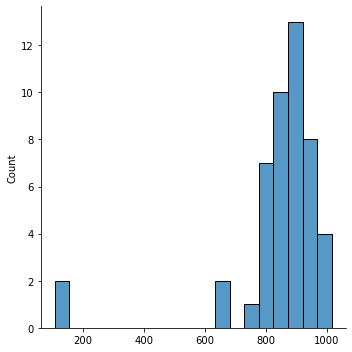

In [17]:
try:
    #print('Average Face Size in this Frame',Average(width_of_face))
    #print('--360P IMAGES---')
    print('Max. Face Size in this Frame',max(width_of_face))
    print('Min. Face Size in this Frame',min(width_of_face))
    print('Average Face size so far:',Average(width_of_face))
    data = Counter(width_of_face)
    get_mode = dict(data)
    mode = [k for k, v in get_mode.items() if v == max(list(data.values()))]
    print('Mode = Face Size in this Frame', mode)
    sns.displot(width_of_face)
except:
    print('No Faces Found')
    pass



In [ ]:
import random

In [18]:
print('-Randomize Face List--')
random.shuffle(face_list)
print('--OUTPUTING FACES')
print('------------------')
start = timeit.default_timer()
#gen_path = './02_Datasets/01_High_Res Image_Datasets_Bulk/White_Man_Faces_Highres/Wh_MH'
gen_path = './02_Datasets/00_Candidate_for_Training/EUROPEAN_jpg_direct/eumixnmsk_'
suffix = '.jpg'
succes = 0
for i in range(len(face_list)):
    if (i < 10):
        prefix ='000'
    elif (i < 100):
        prefix = '00'
    else:
        prefix = '0'
    
    cv2.imwrite(gen_path+prefix+str(i)+suffix, face_list[i])
    succes +=1

end = timeit.default_timer()
print(succes ,'Images are Exported')
print('Time: ',int((end-start)//60),'Minutes, ', int((end-start)%60),' Seconds')

-Randomize Face List--
--OUTPUTING FACES
------------------
47 Images are Exported
Time:  0 Minutes,  1  Seconds


In [ ]:
#resizing facelist
face_list_custom = []
custom_size = 256

for i in range (len(face_list)):
    try:
        face_list_custom.append(cv2.resize (face_list[i],(custom_size,custom_size),interpolation=cv2.INTER_LANCZOS4))
    except:
        continue
        
    if (i%200 ==0):
        print(i,'faces resized,(',round(i/len(face_list)*100,2),'%)')

In [ ]:
random.shuffle(face_list)
print('--OUTPUTING RESIZED FACES')
print('------------------')
start = timeit.default_timer()
#gen_path = './02_Datasets/01_High_Res Image_Datasets_Bulk/White_Man_Faces_Highres/Wh_MH'
gen_path = './Asean_mixed_upscaled/ans_'
suffix = '.jpg'
succes = 0
for i in range(len(face_list)):
    if (i < 10):
        prefix ='000'
    elif (i < 100):
        prefix = '00'
    else:
        prefix = '0'
    try:
        cv2.imwrite(gen_path+prefix+str(i)+suffix, face_list_custom[i])
    except:
        continue
    succes +=1
    
    if (i%200 ==0):
        print(i,'faces resized,(',round(i/len(face_list_custom)*100,2),'%)')

end = timeit.default_timer()
print(succes ,'Images are Exported')
print('Time: ',int((end-start)//60),'Minutes, ', int((end-start)%60),' Seconds')

In [ ]:
!git clone https://github.com/cabani/MaskedFace-Net

In [2]:
import cv2
import glob
import numpy as np
import statistics
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
import timeit
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns


#using existing face and eye detecor model provided by openCV
face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('haarcascade_eye.xml') 

 

In [23]:

path = glob.glob('./02_Datasets/00_Candidate_for_Training/EUROPEAN_png/*.png')
numberOfImage = 0

face_list = []
width_of_image = []


for file in path:
    img = cv2.imread(file)
    
    if img is None:
        continue
    
    height, width = img.shape[:2]
    x,y = 1,1
    
    face_list.append(img[y:height,x:width])
        
    width_of_image.append(width)
    numberOfImage +=1
    
print('--FINISHED--')
print('Image Found: ', len(face_list))

--FINISHED--
Image Found:  50


Max. Face Size in this Frame 1024
Min. Face Size in this Frame 1024
Average Face size so far: 1024.0
Mode = Face Size in this Frame [1024]


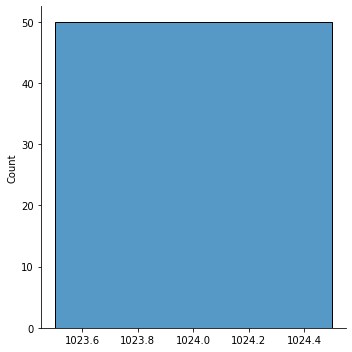

In [24]:
try:
    #print('Average Face Size in this Frame',Average(width_of_face))
    #print('--360P IMAGES---')
    print('Max. Face Size in this Frame',max(width_of_image))
    print('Min. Face Size in this Frame',min(width_of_image))
    print('Average Face size so far:',Average(width_of_image))
    data = Counter(width_of_image)
    get_mode = dict(data)
    mode = [k for k, v in get_mode.items() if v == max(list(data.values()))]
    print('Mode = Face Size in this Frame', mode)
    sns.displot(width_of_image)
except:
    print('No Faces Found')
    pass

In [25]:
len(face_list)

50

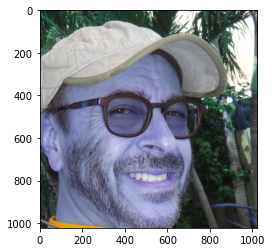

In [12]:
plt.imshow(face_list[2])

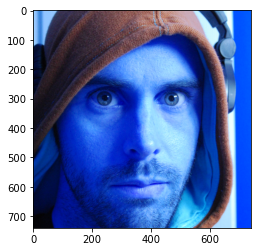

In [22]:
plt.imshow(face_list[4])

In [14]:
import random

In [27]:
random.shuffle(face_list)
print('--OUTPUTING RESIZED FACES')
print('------------------')
start = timeit.default_timer()
#gen_path = './02_Datasets/01_High_Res Image_Datasets_Bulk/White_Man_Faces_Highres/Wh_MH'
gen_path = './02_Datasets/00_Candidate_for_Training/EUROPEAN_jpg_direct/'
suffix = '.jpg'
succes = 0

for i in range(len(face_list)):
    if (i < 10):
        prefix ='000'
    elif (i < 100):
        prefix = '00'
    else:
        prefix = '0'
    try:
        cv2.imwrite(gen_path+prefix+str(i)+suffix, face_list[i])
    except:
        continue
    succes +=1
    
    if (i%200 ==0):
        print(i,'faces resized,(',round(i/len(face_list)*100,2),'%)')

end = timeit.default_timer()
print(succes ,'Images are Exported')
print('Time: ',int((end-start)//60),'Minutes, ', int((end-start)%60),' Seconds')

--OUTPUTING RESIZED FACES
------------------
0 faces resized,( 0.0 %)
50 Images are Exported
Time:  0 Minutes,  1  Seconds
